In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import math

In [2]:
def padding_image(input_img, filter_size):
    adjustment=int(np.floor(filter_size/2))
    return np.pad(input_img,pad_width=adjustment,mode='constant')
    

In [84]:
def normalization(img):
    mi = img.min()
    ma = img.max()
    return (((img-mi)*255.0)/(ma))

In [4]:
def gaussian_kernel(sigma, x):
    return (1/(2*np.pi*(sigma**2)))*(np.e**(-1*((x**2)/(2*(sigma**2)))))

In [5]:
def rse(in_img, out_img):
    k,l = in_img.shape
    s = 0.0
    for i in range(k):
        for j in range(l):
            s += (float(out_img[i][j])-float(in_img[i][j]))**2
    return math.sqrt(s)

In [6]:
def convolution(img, f):
    #output image
    out_img = np.zeros(img.shape)
    
    #fliping the filter in 
    f_flip = np.flip(np.flip(f,0),1)
    
    #getting the dimensios of the filter
    f_n,f_m = f.shape
    
    a = int((f_n-1)/2) 
    b = int((f_m-1)/2)
    
    #padding the image and getting its dimensions
    pd_img = padding_image(img, f_n)
    pd_img_n,pd_img_m = pd_img.shape
    
    for x in range(a, (pd_img_n-a)):
        for y in range(b, (pd_img_m - b)):
            
            img_region = pd_img[ (x-a):(x+(a+1)) , (y-b) : (y+(b+1))]

            out_img[(x-a),(y-b)] = np.sum(np.multiply(img_region, f_flip))
            
    return out_img
    
    

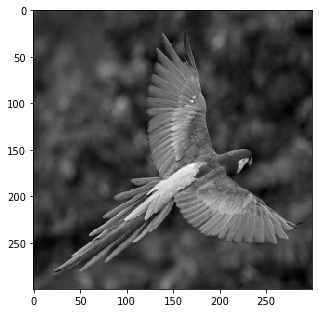

In [7]:
img1 = imageio.imread("images/arara.png")

plt.figure(figsize =(11, 11))
plt.subplot(121)
plt.imshow(img1, cmap="gray", vmin= 0, vmax=255)

In [8]:
f = np.matrix([[0,-1,0], [-1,4,-1], [0,-1,0]])
g = np.matrix([[-1,-1,-1], [-1,4,-1], [-1,-1,-1]])
print(f)
print(g)

[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]
[[-1 -1 -1]
 [-1  4 -1]
 [-1 -1 -1]]


In [10]:
img2 = convolution(img1, f)

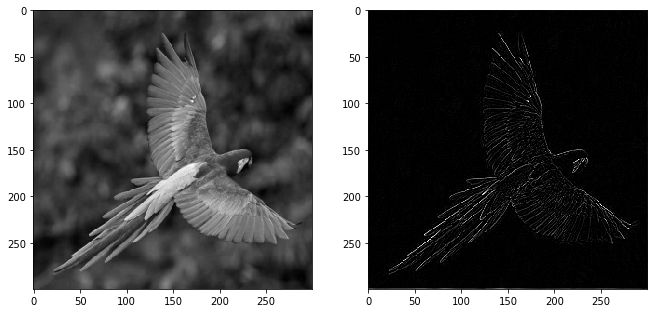

In [11]:
plt.figure(figsize =(11, 11))
plt.subplot(121)
plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(img2, cmap="gray", vmin=0, vmax=255)

In [12]:

img3 = normalization(img2)

-279.0
317.0


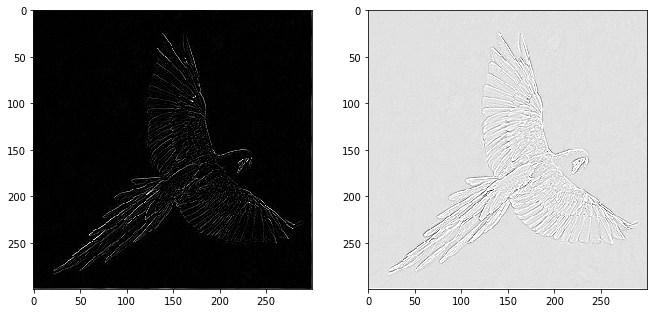

In [13]:
plt.figure(figsize =(11, 11))
plt.subplot(121)
plt.imshow(img2, cmap="gray", vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(img3, cmap="gray", vmin= 0, vmax=255)

In [14]:
img4 =((img3*0.5) + img1)

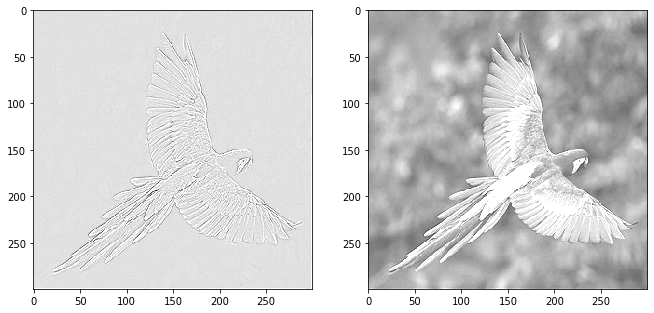

In [15]:
plt.figure(figsize =(11, 11))
plt.subplot(121)
plt.imshow(img3, cmap="gray", vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(img4, cmap="gray", vmin=0, vmax=255)

In [16]:
img_fim = normalization(img4)


56.209779179810724
466.77917981072557


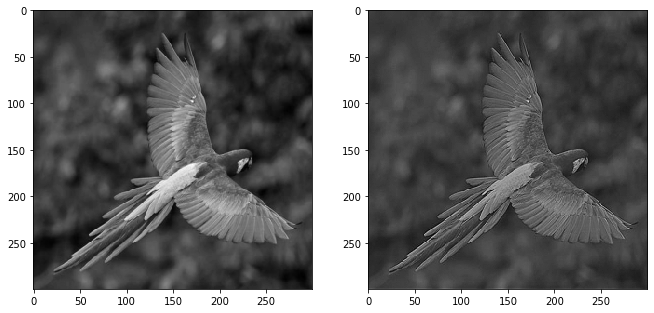

In [17]:
plt.figure(figsize =(11, 11))
plt.subplot(121)
plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(img_fim, cmap="gray", vmin=0, vmax=255)

In [18]:
rse(img1, img_fim)

4817.250297949753

In [76]:
def vignette(img, sigma1, sigma2):
    n, m = img.shape
    
    #crating the tow 1D kernels
    gauss_row = np.zeros((n, 1), dtype = float)
    gauss_col = np.zeros((1, m), dtype = float)
    
    #calculating the kernels' center
    a = int((n-1)/2)
    b = int((m-1)/2)
    
    #calculating the values
    for i in range(0, n):
        gauss_row[i,0] = gaussian_kernel(sigma1, i-a)
        
    for i in range(0, m):
        gauss_col[0,i] = gaussian_kernel(sigma2, i-b)
    
    #multiplying the tow arrays to creatr a gaussian matrix
    f = np.matmul(gauss_row , gauss_col)
    
    #multiplying the original image by the filter
    img_out = np.multiply(img, f)
    
    return img_out

In [77]:
mat= np.zeros((5, 2))

In [90]:
img_1 = imageio.imread("images/airplane.png")

In [91]:
out0 = vignette(img_1,30, 45)
out1 = normalization(out0)

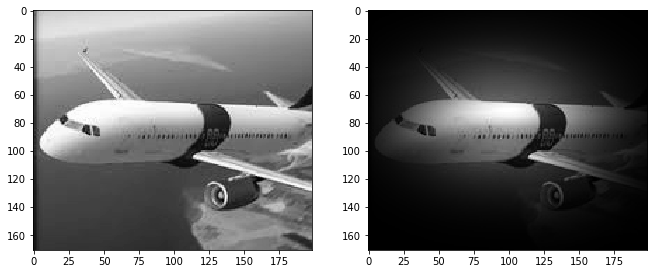

In [92]:
plt.figure(figsize =(11, 11))
plt.subplot(121)
plt.imshow(img_1, cmap="gray", vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(out1, cmap="gray", vmin=0, vmax=255)

In [93]:
rse(img_1, out1)

20391.10694367692